In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузим первый датасет

In [6]:
data = load_boston()
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
y_df = pd.DataFrame(data['target'], columns=['y'])

## Задача*

С помощью модели полиномиальной регрессии построить прогноз цены по признаку LSTAT.

В sklearn нет модели полиномиальной регрессии, но она почти не отличается от линейной регрессии в плане поиска коэфициентов.

Линейная модель:

$$y = a_1 x + b$$

Полиномиальная модель:

$$y = a_1 x + a_2 x^2 + b$$

То есть, можем добавить столбец 'LSTAT^2' и использовать его для прогнозирования вместе со столбцом 'LSTAT'

In [21]:
def plot_graphs(x_test, y_test, y_pred):
    plt.figure()
    plt.xlabel('LSTAT')
    plt.ylabel('target')
    plt.scatter(x_test['LSTAT'], y_pred)
    plt.scatter(x_test['LSTAT'], y_test)
    plt.legend(['Прогноз', 'Факт'])

    plt.figure()
    plt.scatter(y_pred, y_test)
    plt.xlabel('Прогнозные значения')
    plt.ylabel('Фактические значения')
    plt.show()

Score (MSE) = 25.136045871043063


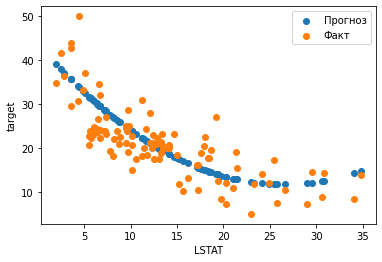

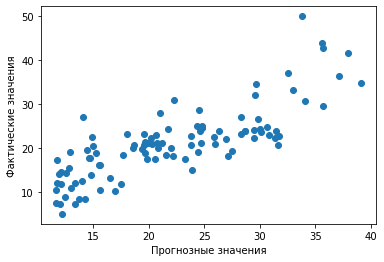

In [22]:
# Добавим столбец в исходный датафрейм X
x_df['LSTAT^2'] = x_df['LSTAT'] ** 2

# Разобьем на треин и тест выборки
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)

# Построим модель и получим прогноз
model = LinearRegression()
model.fit(x_train[['LSTAT', 'LSTAT^2']], y_train)
y_pred = model.predict(x_test[['LSTAT', 'LSTAT^2']])
score = mean_squared_error(y_pred, y_test)
print(f'Score (MSE) = {score}')

# Выведем графики
plot_graphs(x_test, y_test, y_pred)

### Задача
Проверить наличие мультиколлениарности в датасете Boston. Если она есть выкинуть признаки из набора данных

In [ ]:
df_corr = x_df.corr()
df_corr

In [ ]:
df_corr[(np.abs(df_corr) > 0.8)]

In [ ]:
x_df = x_df.drop(columns=['TAX'])
x_df

# Загрузим второй датасет

In [27]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
data = load_digits()
x = data.data
y = data.target
x = (x - x.mean()) / x.std()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

### Задача
Обучить линейную регрессию, посмотреть на точность модели на отложенной выборке

In [33]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.8638888888888889

In [36]:
df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[45,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  1,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 28,  0,  1,  0,  2,  0,  2,  1],
       [ 0,  0,  0, 39,  1,  0,  1,  0,  1,  1],
       [ 0,  2,  0,  1, 19,  1,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  1, 41,  1,  0,  1,  2],
       [ 0,  0,  0,  0,  4,  0, 29,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  1,  0, 33,  1,  0],
       [ 0,  1,  1,  3,  1,  1,  0,  0, 20,  1],
       [ 0,  2,  0,  0,  0,  2,  0,  0,  2, 31]], dtype=int64)

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [34]:
def plot_wrong_classified(x_test, y_test, y_pred, plot_first=5):
    wrong_index = y_pred != y_test
    real_y = y_test[wrong_index]
    predicted_y = y_pred[wrong_index]
    wrong_classified = x_test[wrong_index]
    for i in range(plot_first):
        plt.matshow(wrong_classified[i].reshape(8, 8))
        plt.title(f'real={real_y[i]}, predicted={predicted_y[i]}')

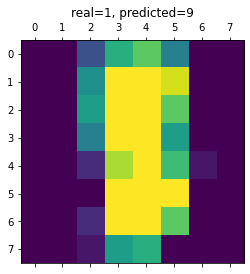

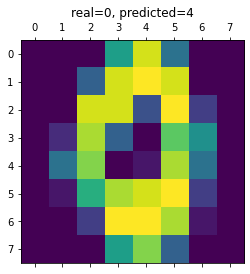

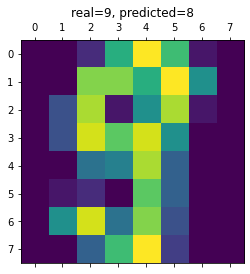

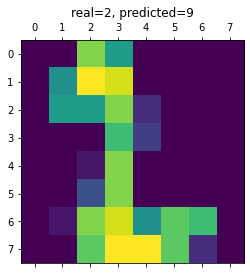

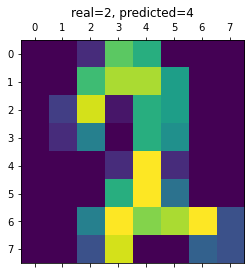

In [35]:
plot_wrong_classified(x_test, y_test, y_pred)